## C.3 Test functional based on the local time

Define discrete approximation of the local time at the point $z$ as

$$L_n^z(X) = \sum_{k=1}^{n} \varphi_n(X_{t_{k,n}})h_n, \quad \varphi_n(x) = \sqrt{\frac{1}{2\pi h_n^{\alpha}}} e^{-\frac{(x-z)^2}{2h_n^{\alpha}}}, \quad \alpha \in (0,2)$$

Then we should compare the sample means, for various approximation schemes, as given in Section C.2, of the test functional of the form for $\theta = 0.5, 1.0, 1.5$,**$\  z=0.5, \alpha = 1$**

$$F_n(\overline{X}^{\theta}) = f(L_n^z(\overline{X}^{\theta})).$$

Particular choice: $f(x) = \text{arctg}\, x$. We will compare

$$\mathbb{E}\left[F_n(\overline{X})\right] - \mathbb{E}\left[F_n(\overline{X}^{\alpha})\right] \tag{LT}$$

**M1 Models**

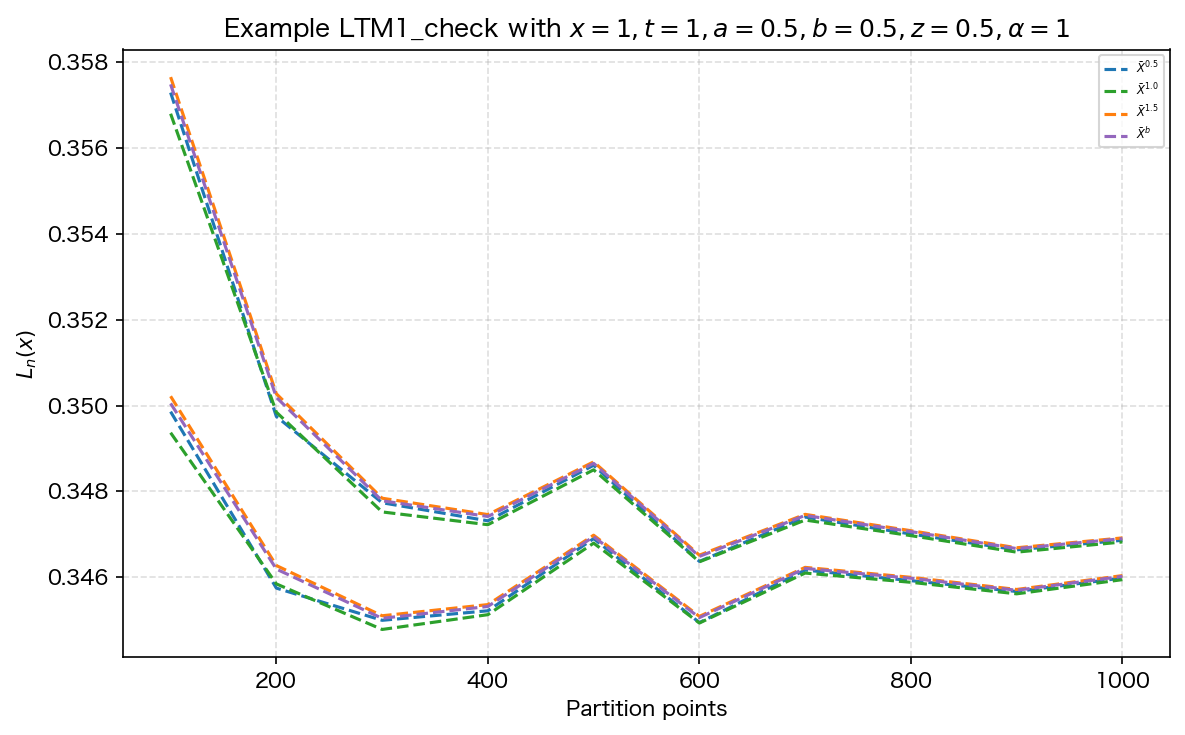

image saved to: sim_pics/LTM1_check_ab0.5_100_1000.png


In [14]:
#LTM1_check_ab0.5_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM1_check_ab0.5_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM1_check_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 8 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM1_check with $x=1,t=1,a=0.5,b=0.5,z=0.5,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel(r'$L_n (x)$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

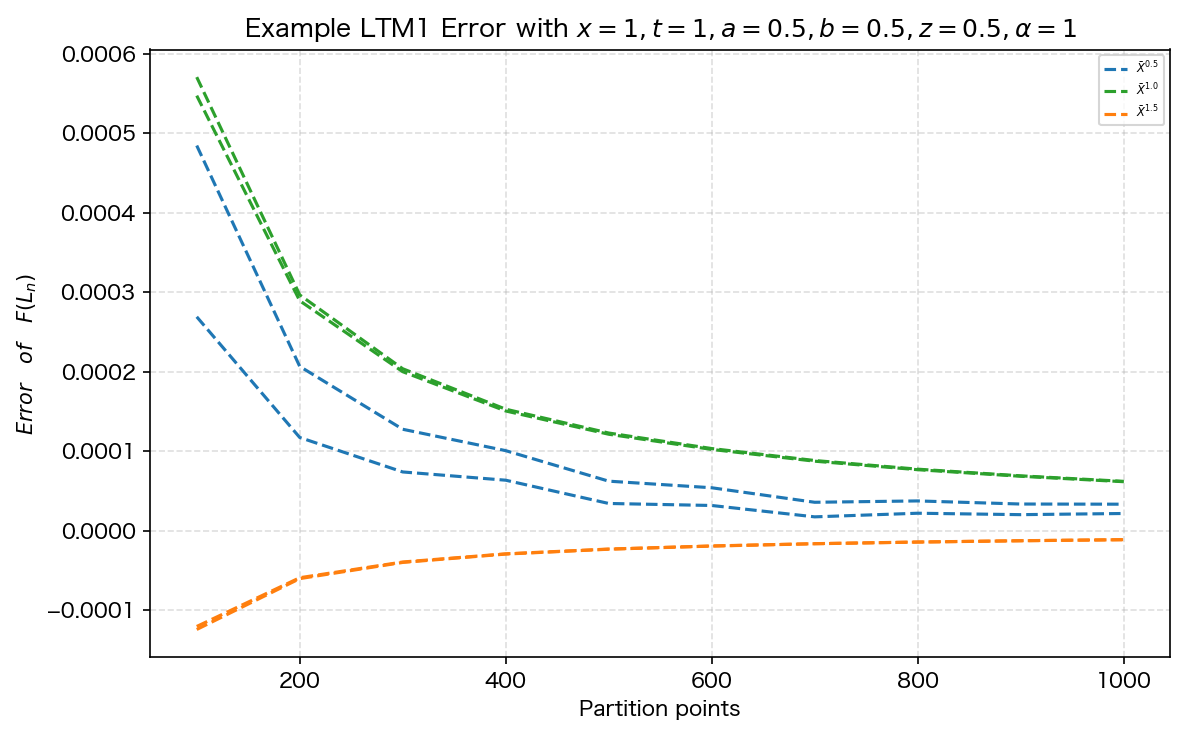

image saved to: sim_pics/LTM1_ab0.5_100_1000.png


In [15]:
#LTM1_ab0.5_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM1_ab0.5_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM1_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
#Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 8 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
#Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
# Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
# Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
#plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
#plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM1 Error with $x=1,t=1,a=0.5,b=0.5,z=0.5,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel(r'$Error\quad of\quad F(L_n)$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

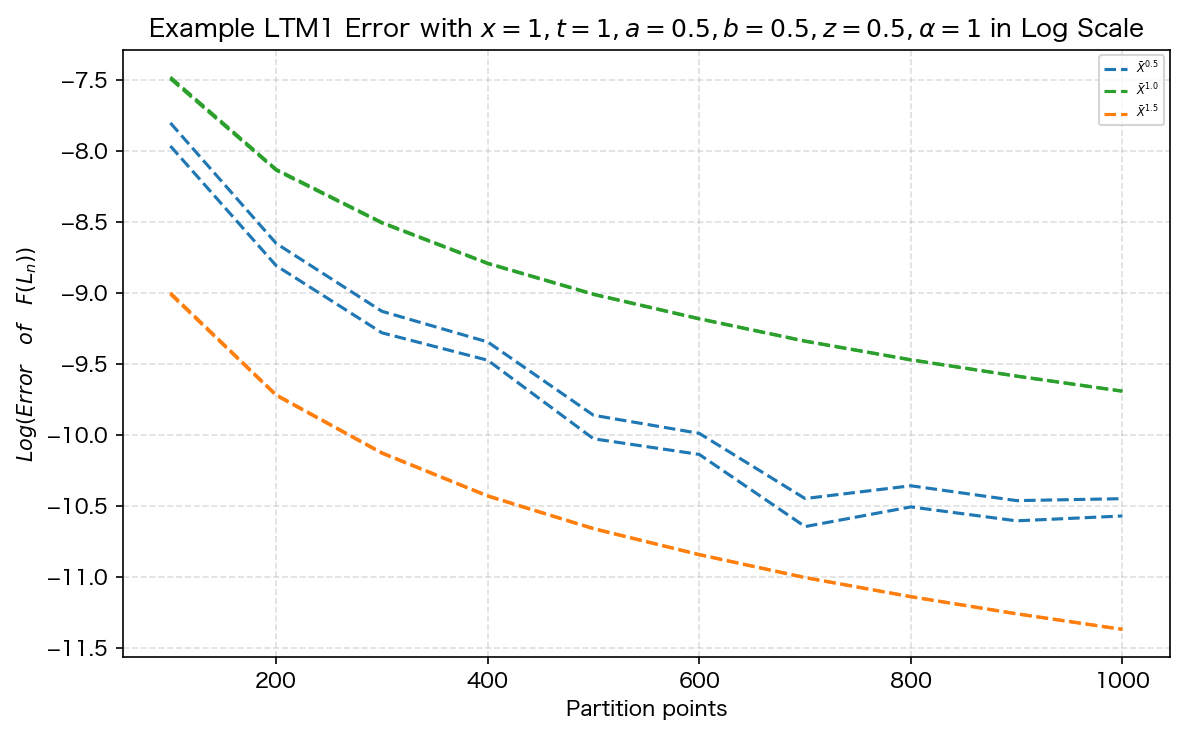

image saved to: sim_pics/LTM1_ab0.5_100_1000_log.png


In [16]:
#LTM1_ab0.5_100_1000 in Logarithmic scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM1_ab0.5_100_1000_log.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM1_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
#Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 100 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
#Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
# Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
# Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

#log変換
A_up_df_log = np.log(abs(A_up_df2))
A_low_df_log = np.log(abs(A_low_df2))
Am_up_df_log = np.log(abs(Am_up_df2))
Am_low_df_log = np.log(abs(Am_low_df2))
A15_up_df_log = np.log(abs(A15_up_df2))
A15_low_df_log = np.log(abs(A15_low_df2))

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df_log, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df_log, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df_log, linestyle="--", color="#ff7f0e")
#plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
#plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM1 Error with $x=1,t=1,a=0.5,b=0.5,z=0.5,\alpha=1$ in Log Scale')
plt.xlabel("Partition points")
plt.ylabel(r'$Log(Error\quad of\quad F(L_n))$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

**M2 Models**

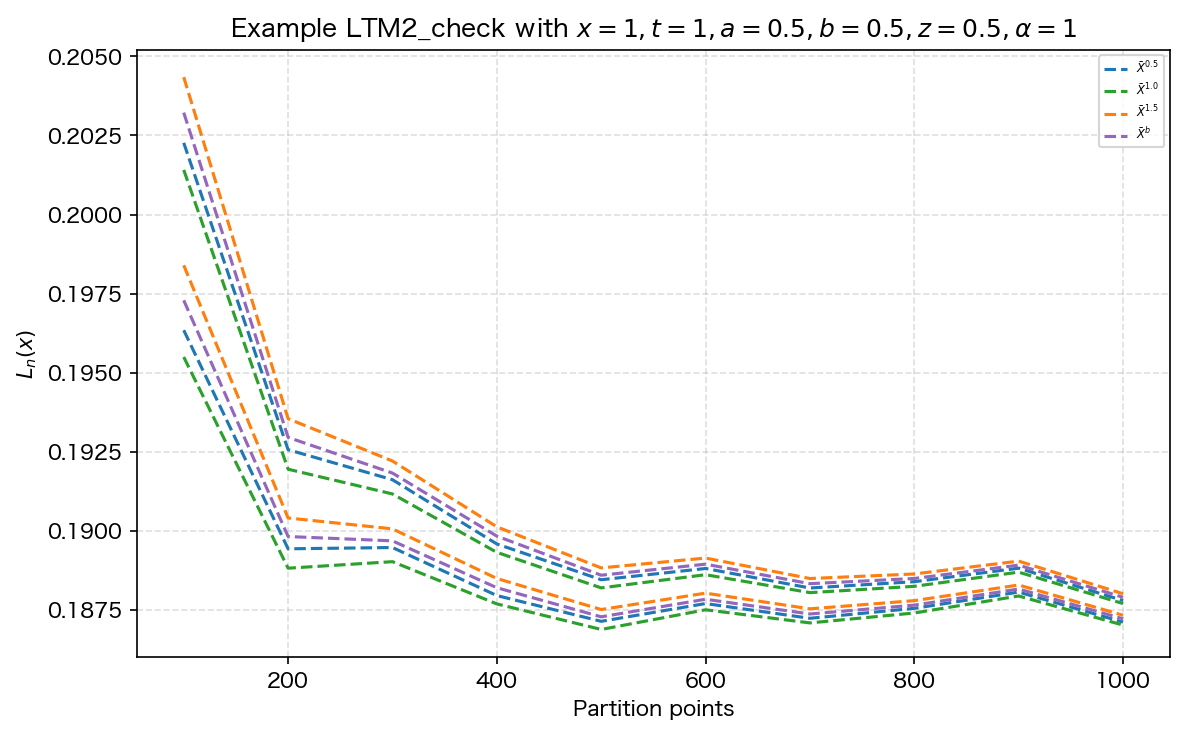

image saved to: sim_pics/LTM2_check_100_1000.png


In [ ]:
#LTM2_check_ab0.5_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM2_check_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM2_check_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 8 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM2_check with $x=1,t=1,a=0.5,b=0.5,z=0.5,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel(r'$L_n (x)$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

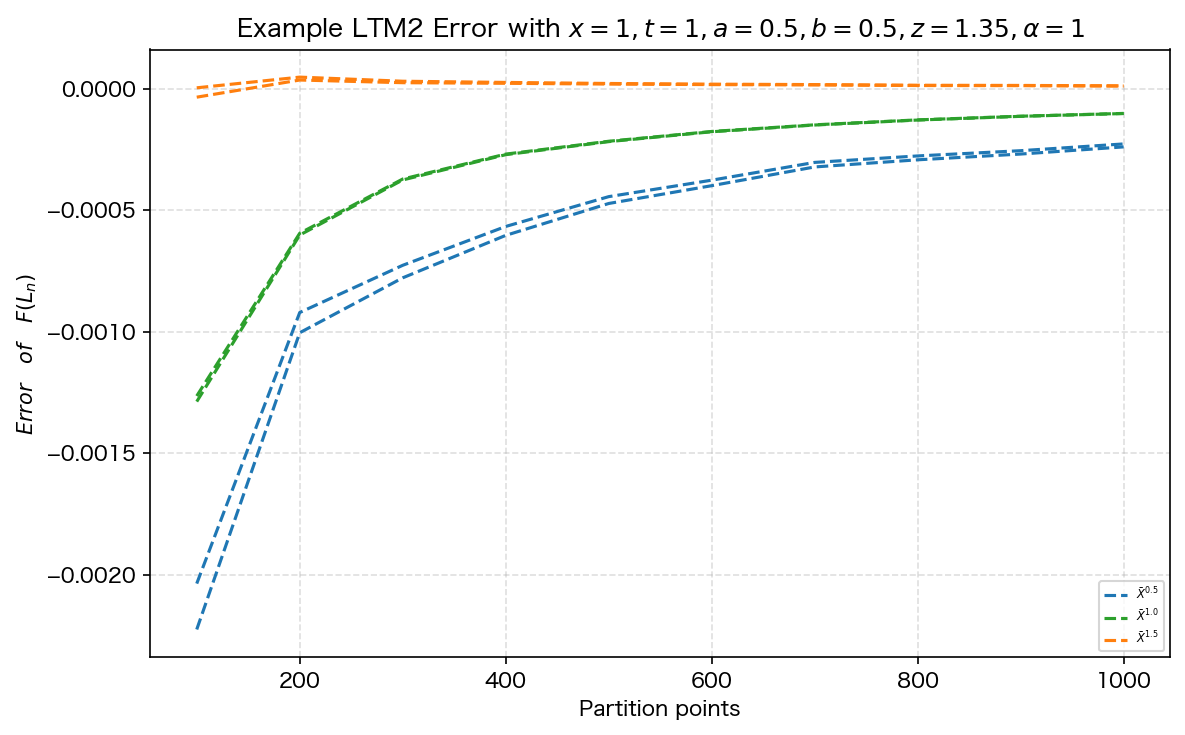

image saved to: sim_pics/LTM2_ab0.5_100_1000.png


In [26]:
#LTM2_ab0.5_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM2_ab0.5_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM2_ab0.5_100_1000_data2.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
#Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
#Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
# Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
# Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
#plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
#plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM2 Error with $x=1,t=1,a=0.5,b=0.5,z=1.35,\alpha=1$')
plt.xlabel("Partition points")
plt.ylabel(r'$Error\quad of\quad F(L_n)$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

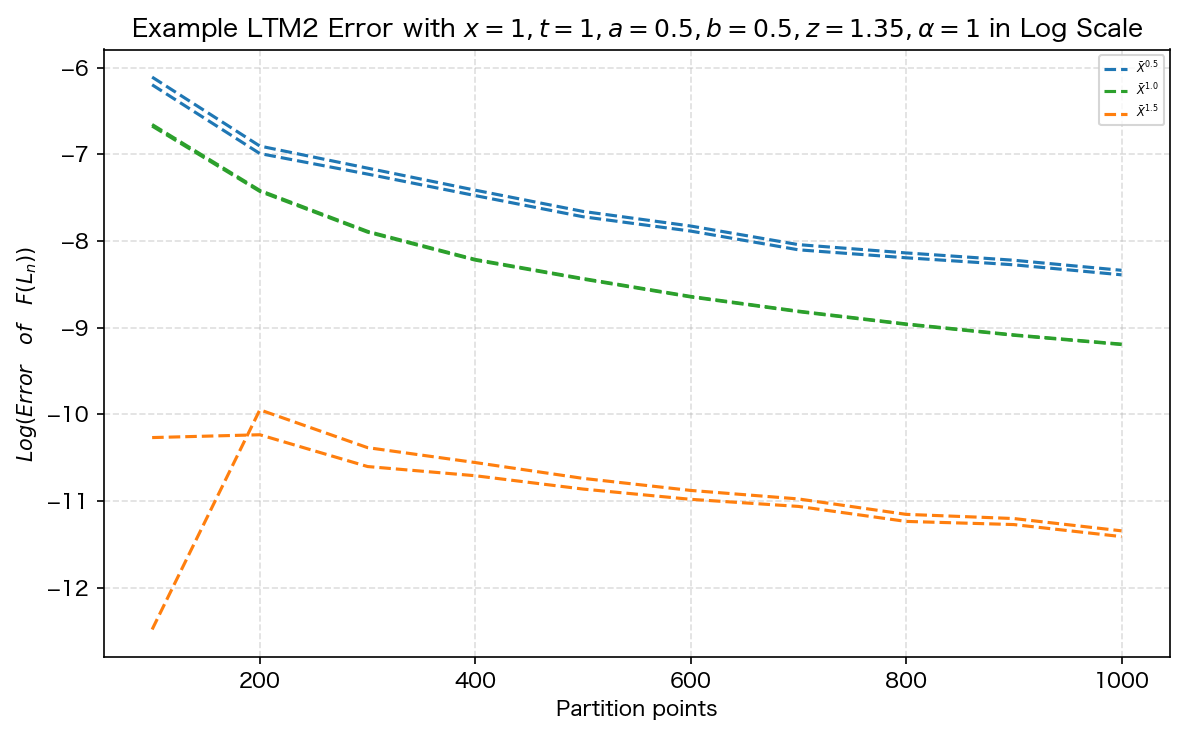

image saved to: sim_pics/LTM2_ab0.5_100_1000_log.png


In [28]:
#LTM2_ab0.5_100_1000 in Logarithmic scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "LTM2_ab0.5_100_1000_log.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/LTM2_ab0.5_100_1000_data2.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
#Axb_std_df2 = np.sqrt(df2['Eb']) #A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
#Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
# Axb_up_df2   = df2['Ab'] + z * Axb_se_df2
# Axb_low_df2  = df2['Ab'] - z * Axb_se_df2

#log変換
A_up_df_log = np.log(abs(A_up_df2))
A_low_df_log = np.log(abs(A_low_df2))
Am_up_df_log = np.log(abs(Am_up_df2))
Am_low_df_log = np.log(abs(Am_low_df2))
A15_up_df_log = np.log(abs(A15_up_df2))
A15_low_df_log = np.log(abs(A15_low_df2))

# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df_log, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df_log, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df_log, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df_log, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df_log, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df_log, linestyle="--", color="#ff7f0e")
#plt.plot(df2["points"], Axb_up_df2, linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$ ")
#plt.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

 


plt.title(r'Example LTM2 Error with $x=1,t=1,a=0.5,b=0.5,z=1.35,\alpha=1$ in Log Scale')
plt.xlabel("Partition points")
plt.ylabel(r'$Log(Error\quad of\quad F(L_n))$ ')
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)